In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
from psifr import fr
from cfr import framework
from cfr import figures
from cymr import network

model_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(model_dir, 'cfr_eeg_mixed.csv')
patterns_file = os.path.join(model_dir, 'cfr_patterns.hdf5')
fit_dir = os.path.join(model_dir, 'fits', 'v5')
fig_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr/figs/sim1'
os.makedirs(fig_dir, exist_ok=True)

plt.style.use('/Users/morton/.matplotlib/matplotlibrc')
plt.rcParams["figure.autolayout"] = False
plt.rcParams['figure.constrained_layout.use'] = False

## Read observed and simulated data

In [2]:
patterns = network.load_patterns(patterns_file)
rsm = patterns['similarity']['use']

In [3]:
components = ['loc', 'cat', 'use', 'loc-cat', 'loc-use', 'cat-use', 'loc-cat-use']
models = [f'cmrs_fcf-{comp}' for comp in components]
model_names = ['I', 'C', 'D', 'IC', 'ID', 'CD', 'ICD']
data = framework.read_model_sims(data_file, fit_dir, models, model_names)

In [4]:
data.head()

subject  list                   item  input  output  study  \
source trial                                                               
I      0            1     2              SEAN PENN    1.0     NaN   True   
       1            1     2         AUDREY HEPBURN    2.0     8.0   True   
       2            1     2  ST PATRICKS CATHEDRAL    3.0    12.0   True   
       3            1     2          LES INVALIDES    4.0     9.0   True   
       4            1     2   GREAT ZIMBABWE RUINS    5.0     NaN   True   

              recall  repeat  intrusion  session  ... list_category  \
source trial                                      ...                 
I      0       False       0      False      1.0  ...         mixed   
       1        True       0      False      1.0  ...         mixed   
       2        True       0      False      1.0  ...         mixed   
       3        True       0      False      1.0  ...         mixed   
       4       False       0      False      1.0  ...         mixed   

             item_index  category block  n_block  block_pos  block_len  curr  \
source trial                                                                   
I      0          228.0       cel   NaN      NaN        NaN        NaN   NaN   
       1           19.0       cel   NaN      NaN        NaN        NaN   NaN   
       2          463.0       loc   NaN      NaN        NaN        NaN   NaN   
       3          364.0       loc   NaN      NaN        NaN        NaN   NaN   
       4          340.0       loc   NaN      NaN        NaN        NaN   NaN   

             prev base  
source trial            
I      0      NaN  NaN  
       1      NaN  NaN  
       2      NaN  NaN  
       3      NaN  NaN  
       4      NaN  NaN  

[5 rows x 21 columns]

In [32]:
curve = sns.color_palette(
    'ch:rot=-.5, light=.6, dark=.3, gamma=1', n_colors=len(models)
)
curve.insert(len(models), (.3, .3, .3))
curve

[(0.44163916703794076, 0.6914342033666265, 0.5414714890673176),
 (0.37680333890180306, 0.6421749281286224, 0.5190472356270401),
 (0.3237814498768263, 0.5927867044161492, 0.5007454824917508),
 (0.27424883716016524, 0.5352555384607786, 0.4809527643729599),
 (0.2328219480554011, 0.4740934551530011, 0.4585285109326825),
 (0.19871588360752257, 0.4101766194959508, 0.43091390277159347),
 (0.17051215858853222, 0.344636926092434, 0.3959064384004337),
 (0.3, 0.3, 0.3)]

In [28]:
dark = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.6', n_colors=len(models)
)
dark.insert(len(models), (.6, .6, .6))
dark

[(0.725301473503126, 0.8645990769601404, 0.7363315007817791),
 (0.6482301081514271, 0.8304114686677412, 0.7026336329579609),
 (0.5726480212561199, 0.7903330615780247, 0.6781127074715647),
 (0.49769124779560403, 0.7396109923554344, 0.6592940288312491),
 (0.434142969265212, 0.6825746803726097, 0.6442133332843847),
 (0.3788481069708822, 0.6159013359528693, 0.6266339293213777),
 (0.33145894574681245, 0.5393097642399239, 0.6005096167923277),
 (0.6, 0.6, 0.6)]

In [29]:
light = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.2', n_colors=len(models)
)
light.insert(len(models), (.85, .85, .85))
light

[(0.8973525746116884, 0.9546730560357413, 0.901891392639006),
 (0.8637400637238504, 0.9432473293594108, 0.8874827533494256),
 (0.8280152843984974, 0.9293987580038842, 0.8771338467738101),
 (0.7891039444527563, 0.9108297736038378, 0.8704169954006072),
 (0.7524272591968628, 0.8882868851933822, 0.8673082498778775),
 (0.7166514659590271, 0.8594380668180563, 0.8659027352474745),
 (0.6820851323976215, 0.8225675908928259, 0.8639314200489312),
 (0.85, 0.85, 0.85)]

## Clustering for all models

In [8]:
lag_rank_within = data.groupby('source').apply(
    fr.lag_rank, test_key='category', test=lambda x, y: x == y
)

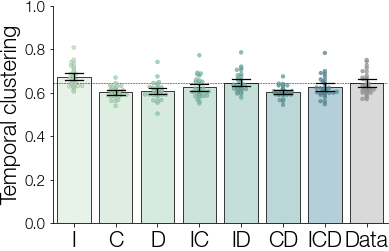

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
figures.plot_swarm_bar(
    lag_rank_within, x='source', y='rank', dark=dark, light=light, ax=ax
)
m = lag_rank_within.loc['Data', 'rank'].mean()
ax.axline([0, m], slope=0, linestyle='--', linewidth=.5, color='k')
ax.set(ylim=(0, 1), ylabel='Temporal clustering');
fig.savefig(os.path.join(fig_dir, 'comp_lag_rank.pdf'))

In [10]:
cat_crp = data.groupby('source').apply(
    fr.category_crp, category_key='category'
)

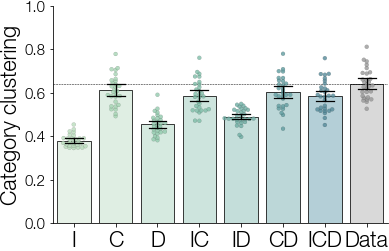

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
figures.plot_swarm_bar(
    cat_crp, x='source', y='prob', dark=dark, light=light, ax=ax
)
m = cat_crp.loc['Data', 'prob'].mean()
ax.axline([0, m], slope=0, linestyle='--', linewidth=.5, color='k')
ax.set(ylim=(0, 1), ylabel='Category clustering');
fig.savefig(os.path.join(fig_dir, 'comp_cat_crp.pdf'))

In [12]:
use_rank = data.groupby('source').apply(
    fr.distance_rank, 'item_index', 1 - rsm, test_key='category',
    test=lambda x, y: x == y
)

/Users/morton/anaconda3/envs/cfr/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


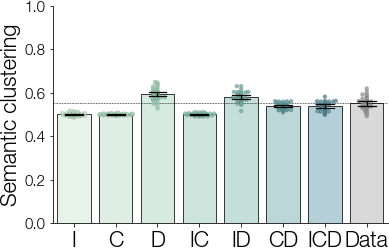

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
figures.plot_swarm_bar(
    use_rank, x='source', y='rank', dark=dark, light=light, ax=ax
)
m = use_rank.loc['Data', 'rank'].mean()
ax.axline([0, m], slope=0, linestyle='--', linewidth=.5, color='k')
ax.set(ylim=(0, 1), ylabel='Semantic clustering');
fig.savefig(os.path.join(fig_dir, 'comp_use_rank.pdf'))

## Curves for a subset of models

In [33]:
opt = {'col_wrap': 4, 'height': 3, 'palette': curve}

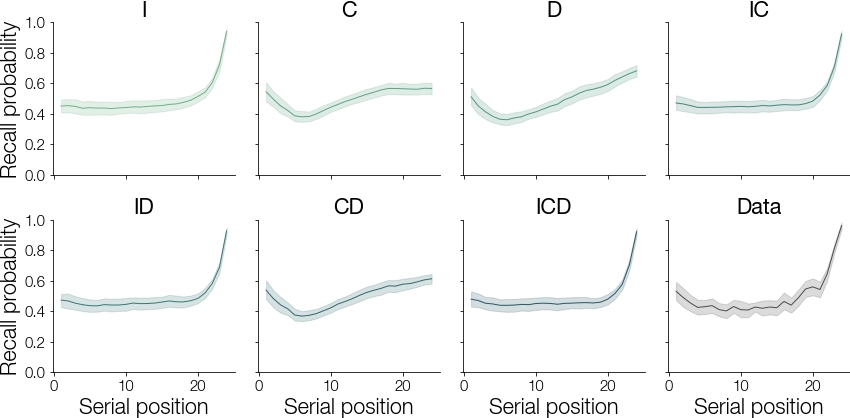

In [34]:
spc = data.groupby('source').apply(fr.spc)
g = fr.plot_spc(spc, col='source', hue='source', **opt)
g.set_titles('{col_name}')
g.savefig(os.path.join(fig_dir, 'spc.pdf'))

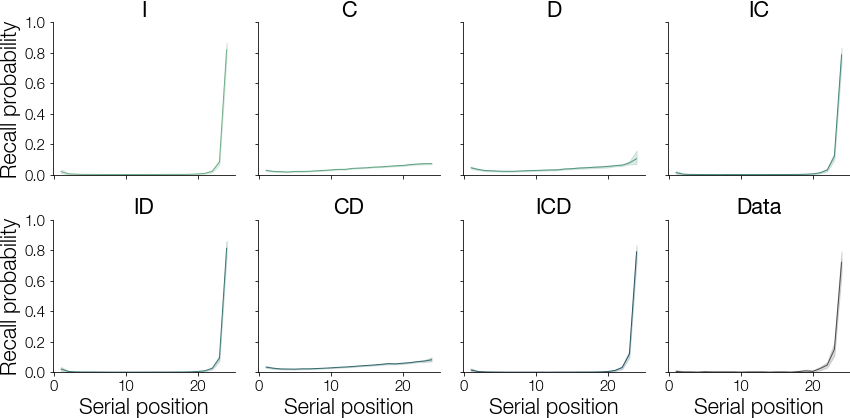

In [35]:
pfr = data.groupby('source').apply(lambda x: fr.pnr(x).query('output == 1'))
g = fr.plot_spc(pfr, col='source', hue='source', **opt)
g.set_titles('{col_name}')
g.savefig(os.path.join(fig_dir, 'pfr.pdf'))

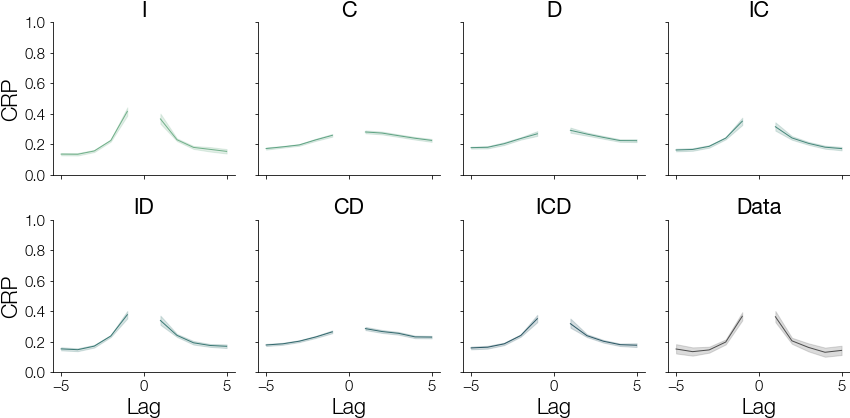

In [36]:
crp = data.groupby('source').apply(fr.lag_crp, test_key='category', test=lambda x, y: x == y)
g = fr.plot_lag_crp(crp, col='source', hue='source', **opt)
g.set_titles('{col_name}')
g.savefig(os.path.join(fig_dir, 'lag_crp.pdf'))

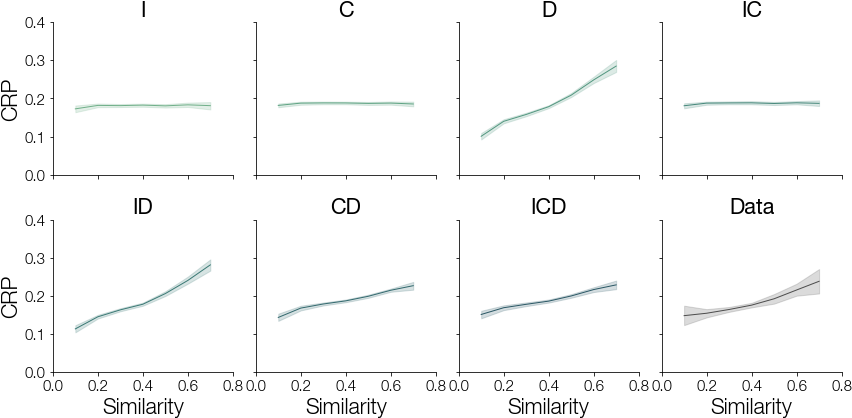

In [37]:
edges = np.linspace(.05, .95, 10)
min_samples=5

dcrp = data.groupby('source').apply(
    fr.distance_crp, 'item_index', rsm, edges, 
    test_key='category', test=lambda x, y: x == y
)
g = fr.plot_distance_crp(
    dcrp, min_samples=min_samples, col='source', hue='source', **opt
)
g.set_titles('{col_name}')
g.set(xlim=(0, .8), ylim=(0, .4), xlabel='Similarity')
g.savefig(os.path.join(fig_dir, 'use_crp_within.pdf'))

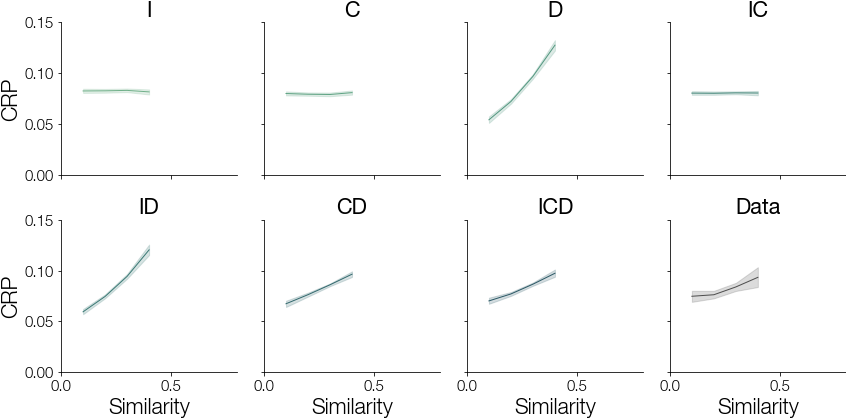

In [38]:
dcrp = data.groupby('source').apply(
    fr.distance_crp, 'item_index', rsm, edges, 
    test_key='category', test=lambda x, y: x != y
)
g = fr.plot_distance_crp(
    dcrp, min_samples=min_samples, col='source', hue='source', **opt
)
g.set_titles('{col_name}')
g.set(xlim=(0, .8), ylim=(0, .15), xlabel='Similarity')
g.savefig(os.path.join(fig_dir, 'use_crp_across.pdf'))

## Individual differences

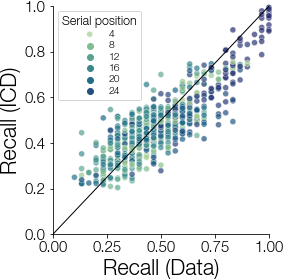

In [141]:
comp = spc.unstack(level=0).droplevel(axis=1, level=0).reset_index()
comp['Serial position'] = comp['input']
g = sns.relplot(
    data=comp, 
    kind='scatter',
    x='Data',
    y='ICD',
    hue='Serial position',
    palette='crest',
    clip_on=False,
    alpha=0.7,
    aspect=1,
    height=4,
)
g.ax.plot([0, 1], [0, 1], '-k');
lt = [t.get_text() for t in g.legend.texts]
g.legend.remove()
g.ax.legend(
    g.ax.collections, 
    lt, 
    fontsize='xx-small', 
    labelspacing=.2, 
    title='Serial position', 
    title_fontsize='x-small',
)
g.set_xlabels('Recall (Data)')
g.set_ylabels('Recall (ICD)')
g.set(xlim=(0, 1), ylim=(0, 1))
g.savefig(os.path.join(fig_dir, 'spc_indiv.pdf'))

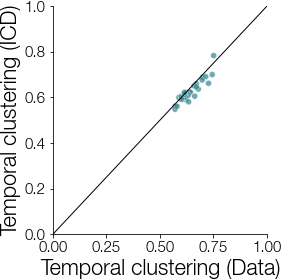

In [142]:
palette = sns.color_palette(n_colors=1)
comp = lag_rank_within.unstack(level=0).droplevel(axis=1, level=0).reset_index()
comp['temp'] = 1
g = sns.relplot(
    data=comp, 
    kind='scatter', 
    x='Data', 
    y='ICD', 
    hue='temp', 
    palette='crest', 
    alpha=0.7,
    aspect=1,
    height=4,
)
g.legend.remove()
g.axes[0, 0].plot([0, 1], [0, 1], '-k');
g.set_xlabels('Temporal clustering (Data)')
g.set_ylabels('Temporal clustering (ICD)')
g.set(xlim=(0, 1), ylim=(0, 1))
g.savefig(os.path.join(fig_dir, 'lag_rank_indiv.pdf'))

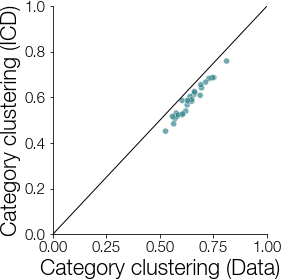

In [143]:
palette = sns.color_palette(n_colors=1)
comp = cat_crp.unstack(level=0)[['prob']].droplevel(axis=1, level=0).reset_index()
comp['temp'] = 1
g = sns.relplot(
    data=comp, 
    kind='scatter', 
    x='Data', 
    y='ICD', 
    hue='temp', 
    palette='crest',
    alpha=0.7,
    aspect=1,
    height=4,
)
g.legend.remove()
g.axes[0, 0].plot([0, 1], [0, 1], '-k');
g.set_xlabels('Category clustering (Data)')
g.set_ylabels('Category clustering (ICD)')
g.set(xlim=(0, 1), ylim=(0, 1))
g.savefig(os.path.join(fig_dir, 'cat_crp_indiv.pdf'))

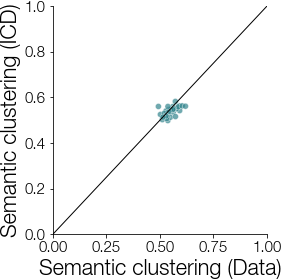

In [144]:
palette = sns.color_palette(n_colors=1)
comp = use_rank.unstack(level=0).droplevel(axis=1, level=0).reset_index()
comp['temp'] = 1
g = sns.relplot(
    data=comp, 
    kind='scatter', 
    x='Data', 
    y='ICD', 
    hue='temp', 
    palette='crest',
    alpha=0.7,
    aspect=1,
    height=4,
)
g.legend.remove()
g.axes[0, 0].plot([0, 1], [0, 1], '-k');
g.set_xlabels('Semantic clustering (Data)')
g.set_ylabels('Semantic clustering (ICD)')
g.set(xlim=(0, 1), ylim=(0, 1))
g.savefig(os.path.join(fig_dir, 'use_rank_indiv.pdf'))